# Data Viz with matplotlib Series 8: Radar chart

## Reference
- radar chart
    <https://en.wikipedia.org/wiki/Radar_chart>
- Effective Use of Radar Charts
    <https://msktc.org/lib/docs/KT_Toolkit/Charts_and_Graphs/Charts_and_Graphics_Radar_508c.pdf>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

## Radar chart

The radar chart is a chart and/or plot that consists of a sequence of equi-angular spokes, called radii, with each spoke representing one of the variables. The data length of a spoke is proportional to the magnitude of the variable for the data point relative to the maximum magnitude of the variable across all data points. A line is drawn connecting the data values for each spoke. This gives the plot a star-like appearance and the origin of one of the popular names for this plot.

### When to use it ?

- Comparing two or more items or groups on various features or characteristics.
- Examining the relative values for a single data point.
- Displaying less than ten factors on one radar chart.
- Less than 8 items.

### Example 1

In [2]:
df = pd.DataFrame({'client_id': ['c1','c2','c3','c4'],
                   'cheese': [2, 5, 4, 3],
                   'beer': [2, 1, 3, 5],
                   'chicken': [5, 3, 3, 4],
                   'bread': [4, 3, 2, 1],
                   'coffee': [2, 3, 5, 3]},
                  columns=['client_id', 'cheese', 'beer', 'chicken', 'bread', 'coffee'])
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [3]:
categories = list(df)[1:]

values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

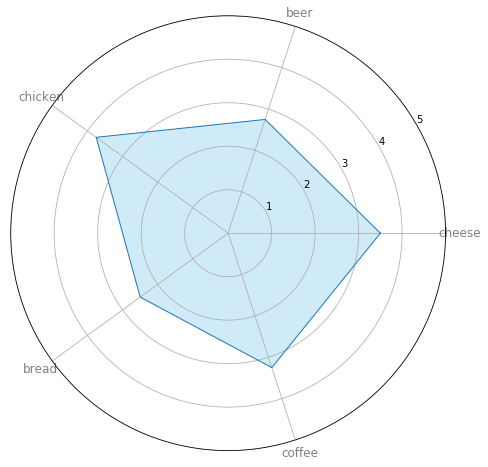

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'], color='grey', size=12)
plt.ylim(0, 5)
ax.set_rlabel_position(30)
 
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)

plt.show()

This radar chart describes the average products' preference of 4 clients. Cheese is the most favored product, however, it seems that bread is not that popular... What're the products of bread? Do they taste bad? Should we change the supplier of bread? Or should we improve the recipe?

### Example 2

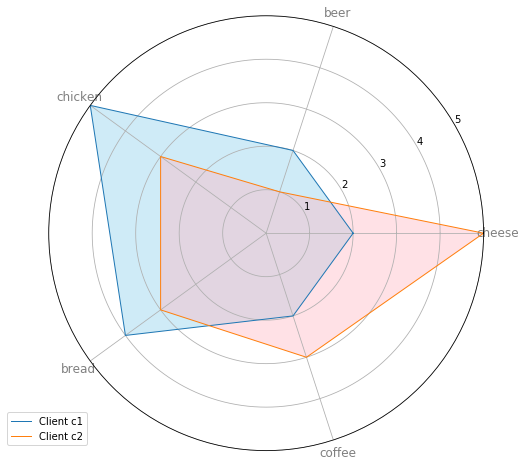

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'], color='grey', size=12)
plt.ylim(0, 5)
ax.set_rlabel_position(30)
 
# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1, linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)
 
# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1, linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

This radar chart displays the preference of 2 clients among 4. Client c1 favors chicken and bread, and doesn't like cheese that much. Nevertheless, client c2 prefers cheese to other 4 products and doesn't like beer. We can have an interview with these 2 clients, in order to find the weakness of products which are out of preference.

### Counter-example

In [6]:
larger_df = pd.DataFrame({'client_id': ['c1','c2','c3','c4'],
                          'cheese': [2, 5, 4, 3],
                          'beer': [2, 1, 3, 5],
                          'chicken': [5, 3, 3, 4],
                          'bread': [4, 3, 2, 1],
                          'coffee': [2, 3, 5, 3],
                          'mochis': [5, 2, 4, 2],
                          'salad': [3, 2, 4, 3],
                          'sandwich': [2, 1, 3, 2],
                          'hotdog': [4, 3, 4, 2],
                          'soup': [4, 3, 2, 3],
                          'juice': [3, 2, 3, 3],
                          'fruit': [3, 4, 3, 5],
                          'hamburger': [3, 3, 4, 2]},
                         columns=['client_id', 'cheese', 'beer', 'chicken', 'bread',
                                  'coffee', 'mochis', 'salad', 'sandwich', 'hotdog',
                                  'soup', 'juice', 'fruit', 'hamburger'])
larger_df

,client_id,cheese,beer,chicken,bread,coffee,mochis,salad,sandwich,hotdog,soup,juice,fruit,hamburger
0,c1,2,2,5,4,2,5,3,2,4,4,3,3,3
1,c2,5,1,3,3,3,2,2,1,3,3,2,4,3
2,c3,4,3,3,2,5,4,4,3,4,2,3,3,4
3,c4,3,5,4,1,3,2,3,2,2,3,3,5,2


In [7]:
larger_categories = list(larger_df)[1:]

larger_values = larger_df.loc[0].drop('client_id').values.flatten().tolist()
larger_values += larger_values[:1] # repeat the first value to close the circular graph

larger_angles = [n / float(len(larger_categories)) * 2 * pi for n in range(len(larger_categories))]
larger_angles += larger_angles[:1]

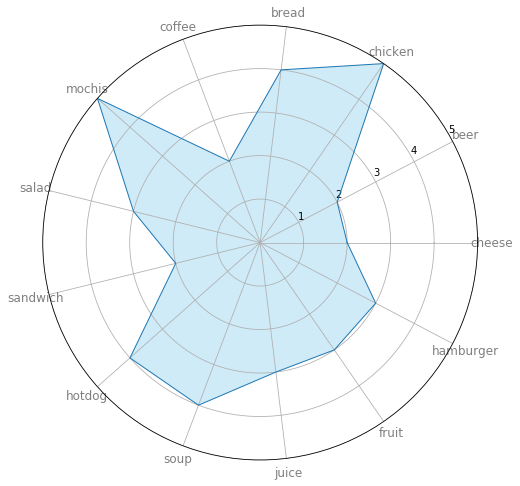

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(larger_angles[:-1], larger_categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'], color='grey', size=12)
plt.ylim(0, 5)
ax.set_rlabel_position(30)
 
ax.plot(larger_angles, larger_values, linewidth=1, linestyle='solid')
ax.fill(larger_angles, larger_values, 'skyblue', alpha=0.4)

plt.show()

In this example, we have client c1's preferences on 13 food. Since the number of food is a bit more, which makes the preference not be obvious. That's why we'd better apply radar chart with less than 8 items.